In [5]:
from utilities import time_evolve
from construct_H_tree import construct_H_tree
from Species import Ca40
from structures import Laser, Chain
from Chamber import Chamber
import numpy as np
from math import sqrt

ion = Ca40([("S1/2", -1 / 2, "S"), ("D5/2", -1 / 2, "D")])

chain = Chain([ion], trap_freqs=[3e6, 3e6, 1e6], selected_modes=[])

mode = chain.modes[-1]
mode.modecutoff(4)

chain.selected_modes = [mode]  # consider one mode

laser = Laser(
    phi=0, k_hat=np.array([1, 0, 1]) / sqrt(2), eps_hat=np.array([1, 0, -1]) / sqrt(2)
)
chamber = Chamber(chain=chain, lasers=[laser], B=4e-4, Bhat=np.array([0, 0, 1]))

chamber.set_laser_wavelength_from_transition(0, ion.transition(("S", "D")))
chamber.set_laser_intensity_from_pi_time(0, 2e-6, ion.transition(("S", "D")))

timescale = 1e-6

H_tree = construct_H_tree(chamber, timescale)
H_tree.apply_single_photon_adiabatic_elimination(threshold=1e-3)
H_tree.apply_ld_and_rwa_approximations(
    n_cutoff=mode.N, ld_cond_th=1e-2, rwa_cutoff="inf"
)

WEAKLY COUPLED TRANSITIONS: []
TRANSITION PROBS: {}
Expanding to 2nd order in the Lamb-Dicke approximation


10.0%. Run time:   0.06s. Est. time left: 00:00:00:00
20.0%. Run time:   0.09s. Est. time left: 00:00:00:00
30.0%. Run time:   0.13s. Est. time left: 00:00:00:00
40.0%. Run time:   0.17s. Est. time left: 00:00:00:00
50.1%. Run time:   0.21s. Est. time left: 00:00:00:00
60.1%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.1%. Run time:   0.36s. Est. time left: 00:00:00:00
100.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.40s


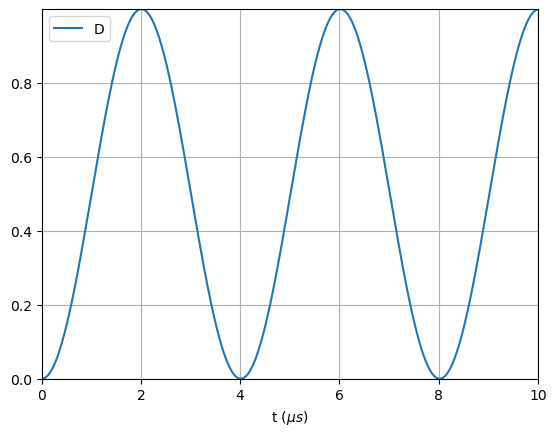

In [6]:
from qutip import tensor

duration = 10
times = np.linspace(0, duration, 1000)

psi_ion = ion.state["S"]
psi_mot = mode.setstate(0)

psi_0 = tensor(psi_ion, psi_mot)

op = chain.ion_projector(1, "D")

results = time_evolve(H_tree, psi_0, times, expt_ops=[op], progress_bar=True)
results.quick_plot()